In [34]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('RTA Dataset.csv')

In [3]:
# Show top 5 records
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
#Check the total number of rows and columns
df.shape

(12316, 32)

In [5]:
# print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
#check missing values in percentage
df.isnull().sum()/100

Time                            0.00
Day_of_week                     0.00
Age_band_of_driver              0.00
Sex_of_driver                   0.00
Educational_level               7.41
Vehicle_driver_relation         5.79
Driving_experience              8.29
Type_of_vehicle                 9.50
Owner_of_vehicle                4.82
Service_year_of_vehicle        39.28
Defect_of_vehicle              44.27
Area_accident_occured           2.39
Lanes_or_Medians                3.85
Road_allignment                 1.42
Types_of_Junction               8.87
Road_surface_type               1.72
Road_surface_conditions         0.00
Light_conditions                0.00
Weather_conditions              0.00
Type_of_collision               1.55
Number_of_vehicles_involved     0.00
Number_of_casualties            0.00
Vehicle_movement                3.08
Casualty_class                  0.00
Sex_of_casualty                 0.00
Age_band_of_casualty            0.00
Casualty_severity               0.00
W

<AxesSubplot: >

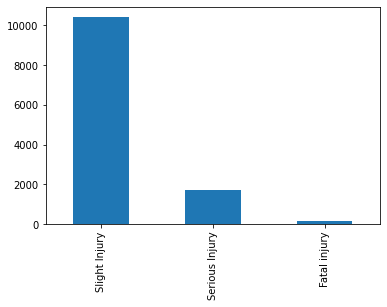

In [7]:
df['Accident_severity'].value_counts().plot(kind='bar')

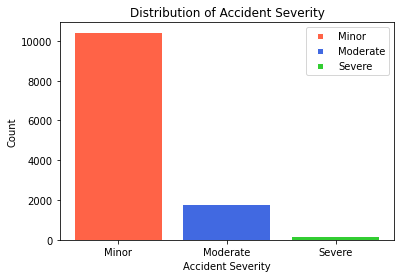

In [8]:
import matplotlib.pyplot as plt

# Get count of each severity level
minor = df[df['Accident_severity'] == 'Slight Injury']['Accident_severity'].count()
moderate = df[df['Accident_severity'] == 'Serious Injury']['Accident_severity'].count()
severe = df[df['Accident_severity'] == 'Fatal injury']['Accident_severity'].count()

# Customize plot
x = [1, 2, 3]
labels = ['Minor', 'Moderate', 'Severe']
y = [minor, moderate, severe]
colors = ['#FF6347', '#4169E1', '#32CD32']

# Plot the bar chart
plt.bar(x, y, color=colors)

# Customize the plot
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Distribution of Accident Severity')
plt.xticks(x, labels)

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, label=label) 
                 for label, color in zip(labels, colors)]
plt.legend(handles=custom_legend)

# Save the plot
plt.savefig('accident_severity_plot.png')
plt.show()


Note:  The above chart shows imbalance multiclass label on the dataset 

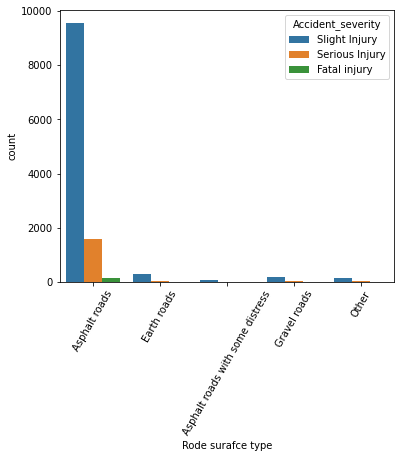

In [9]:
# plot the bar chart of road_surface_type and accident severity feature
plt.figure(figsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show()

In [10]:
# Convert the Time type column into pandas datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
df_new = new_df.drop('Time', axis=1)
df_new.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [11]:
# Fill missing values using the function
def fill_missing_values(df):
    # Loop over each column in the dataframe
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64': # Check if column is numeric
            # Fill missing values with mean
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            # Fill missing values with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

In [12]:
# Fill missing values using the function
df_new = fill_missing_values(df_new)

In [13]:
# Check null values
df_new.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

In [14]:
from sklearn.preprocessing import LabelEncoder

def label_encode_features(df):
    le = LabelEncoder() # create a label encoder object
    
    for col in df.columns:
        if df[col].dtype == 'object': # check if column is of type 'object'
            df[col] = le.fit_transform(df[col].astype(str)) # label encode the column
            
    return df

In [15]:
# Label encode the object-type features using the function
new_df = label_encode_features(new_df)

In [16]:
new_df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,2023-08-29 17:02:00,1,0,1,0,0,0,0,3,3,...,3,2,5,3,7,5,5,9,2,17
1,2023-08-29 17:02:00,1,1,1,4,0,3,11,3,2,...,3,2,5,3,7,5,5,16,2,17
2,2023-08-29 17:02:00,1,0,1,4,0,0,5,3,6,...,0,1,1,2,0,5,5,0,1,17
3,2023-08-29 01:06:00,3,0,1,4,0,2,11,0,6,...,2,0,0,2,0,2,5,1,2,1
4,2023-08-29 01:06:00,3,0,1,4,0,1,17,3,2,...,3,2,5,3,7,5,5,16,2,1


In [17]:
#Splitting data into features and target
X = new_df.drop(['Accident_severity', 'Time'], axis=1)
y = new_df['Accident_severity']

In [18]:
X

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Hour_of_Day
0,1,0,1,0,0,0,0,3,3,2,...,2,3,2,5,3,7,5,5,9,17
1,1,1,1,4,0,3,11,3,2,2,...,2,3,2,5,3,7,5,5,16,17
2,1,0,1,4,0,0,5,3,6,2,...,2,0,1,1,2,0,5,5,0,17
3,3,0,1,4,0,2,11,0,6,2,...,2,2,0,0,2,0,2,5,1,1
4,3,0,1,4,0,1,17,3,2,2,...,2,3,2,5,3,7,5,5,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,1,1,7,0,1,4,3,6,2,...,2,3,2,5,3,0,2,5,10,16
12312,3,4,1,1,0,2,0,3,6,2,...,4,3,2,5,3,0,2,5,10,18
12313,3,2,1,4,0,2,1,3,1,2,...,4,0,1,1,2,0,2,5,1,13
12314,3,0,0,4,0,3,5,3,1,2,...,4,3,2,5,3,0,2,5,5,13


In [19]:
!pip install imblearn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
le = LabelEncoder()
y = le.fit_transform(y)
sc = StandardScaler() # transform to a range of 0 - 1
X = sc.fit_transform(X)

#Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#use smote techniques to handle imbalance class
smote = SMOTE(random_state=42)


X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [22]:
# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)

In [23]:
#train the model on X and y train
rf.fit(X_train_res, y_train_res)

# predicting on test data
predics = rf.predict(X_test)

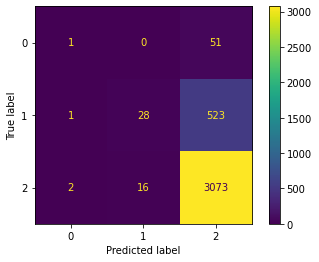

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predics)
ConfusionMatrixDisplay(cm).plot()

In [25]:
# classification report on test dataset
classif_re = classification_report(y_test,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.25      0.02      0.04        52
           1       0.64      0.05      0.09       552
           2       0.84      0.99      0.91      3091

    accuracy                           0.84      3695
   macro avg       0.58      0.35      0.35      3695
weighted avg       0.80      0.84      0.78      3695



In [26]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [28]:
dtc_model = decisionTree.fit(X_train_res, y_train_res)

In [29]:
from matplotlib import pyplot

Feature: 0, Score: 0.05331
Feature: 1, Score: 0.05248
Feature: 2, Score: 0.00257
Feature: 3, Score: 0.02819
Feature: 4, Score: 0.01384
Feature: 5, Score: 0.08025
Feature: 6, Score: 0.02958
Feature: 7, Score: 0.00843
Feature: 8, Score: 0.03239
Feature: 9, Score: 0.01654
Feature: 10, Score: 0.03844
Feature: 11, Score: 0.04196
Feature: 12, Score: 0.01390
Feature: 13, Score: 0.02410
Feature: 14, Score: 0.00367
Feature: 15, Score: 0.00510
Feature: 16, Score: 0.00969
Feature: 17, Score: 0.01270
Feature: 18, Score: 0.01594
Feature: 19, Score: 0.11763
Feature: 20, Score: 0.13859
Feature: 21, Score: 0.02480
Feature: 22, Score: 0.01257
Feature: 23, Score: 0.00763
Feature: 24, Score: 0.02228
Feature: 25, Score: 0.00300
Feature: 26, Score: 0.05121
Feature: 27, Score: 0.01410
Feature: 28, Score: 0.02025
Feature: 29, Score: 0.05293
Feature: 30, Score: 0.05191


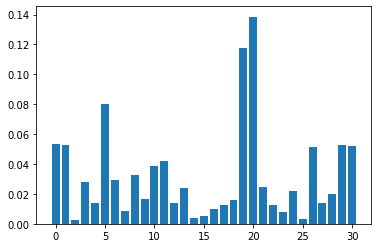

In [30]:
# feature importance

importance = dtc_model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Barchat for feature importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [31]:
prediction = dtc_model.predict(X_test)

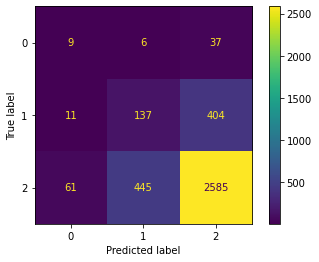

In [32]:
cm = confusion_matrix(y_test, prediction)
ConfusionMatrixDisplay(cm).plot()

In [33]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.11      0.17      0.14        52
           1       0.23      0.25      0.24       552
           2       0.85      0.84      0.85      3091

    accuracy                           0.74      3695
   macro avg       0.40      0.42      0.41      3695
weighted avg       0.75      0.74      0.74      3695

